In [51]:
import pandas as ps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
import seaborn as sb
from sklearn.metrics import classification_report



gender=ps.read_csv('gender.csv')
gender.drop('Unnamed: 9',axis=1,inplace=True)

gender

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow
...,...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Associate's Degree,Single,60000,Orange
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black
128,female,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow


In [31]:
gender[' Gender']=gender[' Gender'].map({' male':0,' female':1,'male ':0,'female ':1,'male':0,'female':0})
gender

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,0,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,0,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,1,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,0,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,1,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow
...,...,...,...,...,...,...,...,...,...
126,0,32,170,64,Nurse,Associate's Degree,Single,60000,Orange
127,0,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black
128,0,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green
129,0,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow


In [32]:
gender.isnull().sum()

 Gender             0
 Age                0
 Height (cm)        0
 Weight (kg)        0
 Occupation         0
 Education Level    0
 Marital Status     0
 Income (USD)       0
 Favorite Color     0
dtype: int64

In [54]:
x = gender[[' Age', ' Weight (kg)',' Height (cm)']]
y = gender[' Gender']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=40,startify=y)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.67


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U7'), dtype('float64')) -> None

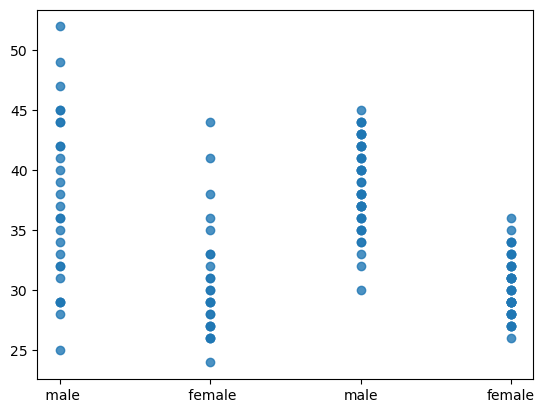

In [47]:
sb.regplot(x=' Gender',y=' Age',data=gender)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        23
           1       0.00      0.00      0.00         4

    accuracy                           0.85        27
   macro avg       0.43      0.50      0.46        27
weighted avg       0.73      0.85      0.78        27



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


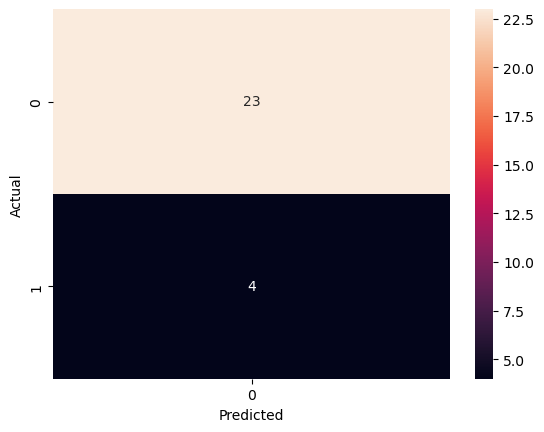

In [52]:
confusion_matrix = ps.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(confusion_matrix, annot=True)
print(classification_report(y_test,y_pred))


# Question 3

In [ ]:
''''Une courbe ROC (Receiver Operating Characteristic) est un graphique qui montre les 
performances d'un modèle de classification à tous les seuils de classification
AUC signifie "Area under the ROC Curve"" (aire sous la courbe ROC). C'est-à-dire que l'AUC mesure 
toute l'aire à deux dimensions sous l'intégralité de la courbe ROC de (0,0) à (1,1).''''
 
